In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##**TABLE**

In [ ]:
data = pd.read_csv("glass_identification.csv")
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.001,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.000,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.000,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.000,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.000,1


In [ ]:
df = data[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']]
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.001,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.000,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.000,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.000,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.000,1


# **Data Profiling**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



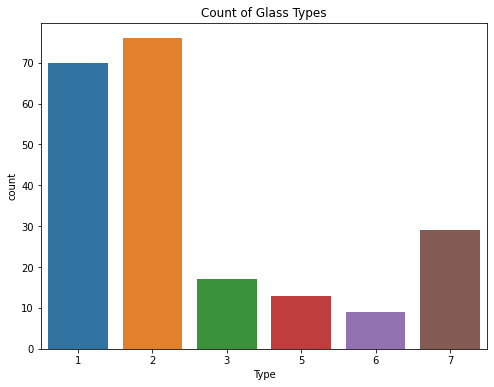

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot('Type',data=df).set_title('Count of Glass Types')
plt.show()

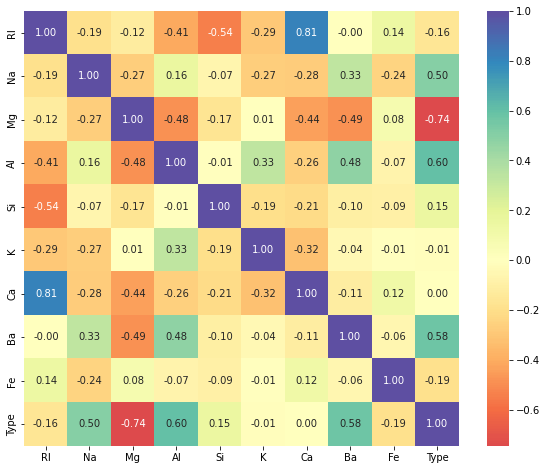

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),fmt='.2f',annot=True,cmap='Spectral',square=True,center=0)
plt.show()

**KNN**

In [ ]:
#Authors: Himanshu Soni(ELC19018) & Pranjal Shrivastava(ELC19037)​
#Objective: To classify different samples of glasses​
#Input: Inside the program​
#Output: To display the Accuracy Score vs K value 
X = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
Y = df[['Type']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (171, 9) (171, 1)
Test set: (43, 9) (43, 1)


In [ ]:
k_value = 26
acc_score = []
for i in range(1,k_value):
  neighbour = KNeighborsClassifier(n_neighbors = i)
  neighbour.fit(X_train,y_train)
  y_hat = neighbour.predict(X_test)
  acc_score.append(metrics.accuracy_score(y_test,y_hat)*100)
fig = px.line(x=range(1,k_value),y=acc_score,labels={'x':'K Values','y':'Accuracy Score(%)'})
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was pa

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4,metric='minkowski')
knn.fit(X_train,y_train)
y_hat_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_hat_pred))
print("Accuracy Score : ",np.round(metrics.accuracy_score(y_test,y_hat_pred)*100,2))
#print(classification_report(y_test,y_hat_pred))
#plt.figure(figsize=(10,8))
#plot_confusion_matrix(knn,X_test,y_test)
#plt.show()

[[ 8  6  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  1  1  1]
 [ 1  0  0  0  1  6]]
Accuracy Score :  65.12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



**KNN with Standardization**

In [ ]:
#Authors: Himanshu Soni(ELC19018) & Pranjal Shrivastava(ELC19037)​
#Objective: To classify different samples of glasses​
#Input: Inside the program​
#Output: To display the Accuracy Score vs K value 
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])
print(Y[0:5])

[[ 0.87286765  0.28495326  1.25463857 -0.69244192 -1.12708201 -0.67170546
  -0.14576634 -0.35287683 -0.57622815]
 [-0.24933347  0.59181718  0.63616803 -0.17046023  0.10231907 -0.02621325
  -0.79373376 -0.35287683 -0.58651536]
 [-0.72131806  0.14993314  0.60142249  0.19091171  0.43878673 -0.16453301
  -0.82894938 -0.35287683 -0.58651536]
 [-0.23283051 -0.24285268  0.69870999 -0.31099376 -0.0529737   0.11210651
  -0.51905192 -0.35287683 -0.58651536]
 [-0.31204471 -0.16920534  0.65006624 -0.41137486  0.55525631  0.08136879
  -0.62469878 -0.35287683 -0.58651536]]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
k_value = 26
acc_score = []
for i in range(1,k_value):
  neighbour = KNeighborsClassifier(n_neighbors = i)
  neighbour.fit(X_train,y_train)
  y_hat = neighbour.predict(X_test)
  acc_score.append(metrics.accuracy_score(y_test,y_hat)*100)
fig = px.line(x=range(1,k_value),y=acc_score,labels={'x':'K Values','y':'Accuracy Score(%)'})
fig.show()

Train set: (171, 9) (171, 1)
Test set: (43, 9) (43, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was pa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



[[10  0  0  0  0  0]
 [ 2 12  0  3  0  0]
 [ 4  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  1  0]
 [ 0  1  0  0  1  8]]
Accuracy Score :  72.09
              precision    recall  f1-score   support

           1       0.62      1.00      0.77        10
           2       0.92      0.71      0.80        17
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0
           6       0.50      0.50      0.50         2
           7       1.00      0.80      0.89        10

    accuracy                           0.72        43
   macro avg       0.51      0.50      0.49        43
weighted avg       0.77      0.72      0.73        43



<Figure size 720x576 with 0 Axes>

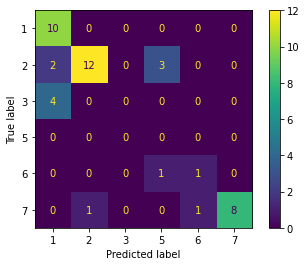

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4,metric='minkowski')
knn.fit(X_train,y_train)
y_hat_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_hat_pred))
print("Accuracy Score : ",np.round(metrics.accuracy_score(y_test,y_hat_pred)*100,2))
print(classification_report(y_test,y_hat_pred))
plt.figure(figsize=(10,8))
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

**KNN with Normalization**

In [ ]:
#Authors: Himanshu Soni(ELC19018) & Pranjal Shrivastava(ELC19037)​
#Objective: To classify different samples of glasses​
#Input: Inside the program​
#Output: To display the Accuracy Score vs K value 
X = preprocessing.MinMaxScaler().fit(X).transform(X.astype(float))
print(X[0:5])
print(Y[0:5])

[[0.43283582 0.43759398 1.         0.25233645 0.35178571 0.00966184
  0.30855019 0.         0.00196078]
 [0.28358209 0.47518797 0.80178174 0.33333333 0.52142857 0.07729469
  0.22304833 0.         0.        ]
 [0.22080773 0.42105263 0.79064588 0.3894081  0.56785714 0.06280193
  0.21840149 0.         0.        ]
 [0.285777   0.37293233 0.82182628 0.31152648 0.5        0.09178744
  0.25929368 0.         0.        ]
 [0.27524144 0.38195489 0.80623608 0.29595016 0.58392857 0.08856683
  0.24535316 0.         0.        ]]
[[1]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
k_value = 26
acc_score = []
for i in range(1,k_value):
  neighbour = KNeighborsClassifier(n_neighbors = i)
  neighbour.fit(X_train,y_train)
  y_hat = neighbour.predict(X_test)
  acc_score.append(metrics.accuracy_score(y_test,y_hat)*100)
fig = px.line(x=range(1,k_value),y=acc_score,labels={'x':'K Values','y':'Accuracy Score(%)'})
fig.show()

Train set: (171, 9) (171, 1)
Test set: (43, 9) (43, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was pa

[[12  0  0  0  0  0]
 [ 4 12  1  2  0  0]
 [ 0  0  0  0  0  0]
 [ 0  1  0  0  1  1]
 [ 0  1  0  1  1  0]
 [ 0  1  0  1  0  4]]
Accuracy Score :  67.44
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        12
           2       0.80      0.63      0.71        19
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         3
           6       0.50      0.33      0.40         3
           7       0.80      0.67      0.73         6

    accuracy                           0.67        43
   macro avg       0.47      0.44      0.45        43
weighted avg       0.71      0.67      0.68        43



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



<Figure size 720x576 with 0 Axes>

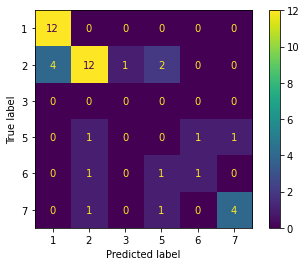

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train,y_train)
y_hat_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_hat_pred))
print("Accuracy Score : ",np.round(metrics.accuracy_score(y_test,y_hat_pred)*100,2))
print(classification_report(y_test,y_hat_pred))
plt.figure(figsize=(10,8))
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

**PCA**

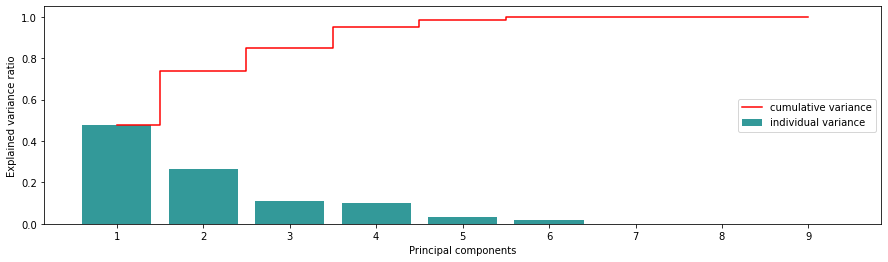

In [ ]:
X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 2)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
plt.figure(figsize=(15,4))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [ ]:
#Authors: Himanshu Soni(ELC19018) & Pranjal Shrivastava(ELC19037)​
#Objective: To classify different samples of glasses​
#Input: Inside the program​
#Output: To display the Accuracy Score vs K value 
df_scaled = StandardScaler().fit(df).transform(df)
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape)
print(X_pca.shape)

(214, 9)
(214, 4)


 **PCA+KNN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,Y,test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
k_value = 26
acc_score = []
for i in range(1,k_value):
  neighbour = KNeighborsClassifier(n_neighbors = i)
  neighbour.fit(X_train,y_train)
  y_hat = neighbour.predict(X_test)
  acc_score.append(metrics.accuracy_score(y_test,y_hat)*100)
fig = px.line(x=range(1,k_value),y=acc_score,labels={'x':'K Values','y':'Accuracy Score(%)'})
fig.show()

Train set: (171, 4) (171, 1)
Test set: (43, 4) (43, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was pa

[[10  1  0  0  0  0]
 [ 6 14  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  1  8]]
Accuracy Score :  79.07
              precision    recall  f1-score   support

           1       0.59      0.91      0.71        11
           2       0.93      0.70      0.80        20
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         0
           7       1.00      0.89      0.94         9

    accuracy                           0.79        43
   macro avg       0.59      0.58      0.58        43
weighted avg       0.84      0.79      0.80        43



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



<Figure size 720x576 with 0 Axes>

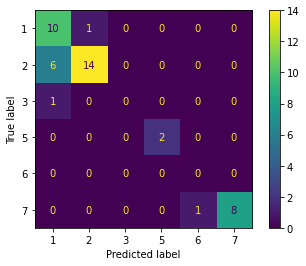

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
knn.fit(X_train,y_train)
y_hat_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_hat_pred))
print("Accuracy Score : ",np.round(metrics.accuracy_score(y_test,y_hat_pred)*100,2))
print(classification_report(y_test,y_hat_pred))
plt.figure(figsize=(10,8))
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

In [ ]:
"""## Importing the dataset"""
dataset = pd.read_csv('glass_identification.csv')
dataset.head()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dataset)
scaled_data=scaler.transform(dataset)
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
dataset.drop(['ID'],axis = 1,inplace = True)
x_std = StandardScaler().fit_transform(dataset)
mean_vec = np.mean(x_std, axis = 0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec))/(x_std.shape[0]-1)
cov_1 =  pd.DataFrame(np.round(cov_mat,2))
print('Covariance Matrix \n', cov_1)

Covariance Matrix 
       0     1     2     3     4     5     6     7     8     9
0  1.00 -0.19 -0.12 -0.41 -0.54 -0.29  0.81 -0.00  0.14 -0.17
1 -0.19  1.00 -0.28  0.16 -0.07 -0.27 -0.28  0.33 -0.24  0.51
2 -0.12 -0.28  1.00 -0.48 -0.17  0.01 -0.45 -0.49  0.08 -0.75
3 -0.41  0.16 -0.48  1.00 -0.01  0.33 -0.26  0.48 -0.07  0.60
4 -0.54 -0.07 -0.17 -0.01  1.00 -0.19 -0.21 -0.10 -0.09  0.15
5 -0.29 -0.27  0.01  0.33 -0.19  1.00 -0.32 -0.04 -0.01 -0.01
6  0.81 -0.28 -0.45 -0.26 -0.21 -0.32  1.00 -0.11  0.13  0.00
7 -0.00  0.33 -0.49  0.48 -0.10 -0.04 -0.11  1.00 -0.06  0.58
8  0.14 -0.24  0.08 -0.07 -0.09 -0.01  0.13 -0.06  1.00 -0.19
9 -0.17  0.51 -0.75  0.60  0.15 -0.01  0.00  0.58 -0.19  1.00


In [ ]:
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigen Vectors \n',eig_vecs)
print('Eigen Values \n',np.round(eig_vals,3))
sup = 0
for i in range(0,10):
    for j in range(0,10):
        if i>j:
            sup = sup + cov_mat[i][j]
print('Sum of Upper Triangle of Co-Variance Matrix :\n',(sup))

Eigen Values 
 [3.070e+00 2.302e+00 1.416e+00 1.172e+00 9.180e-01 5.500e-01 3.710e-01
 1.840e-01 2.000e-03 6.200e-02]
Sum of Upper Triangle of Co-Variance Matrix :
 -2.5762259025407093


In [ ]:
x_pca = StandardScaler().fit_transform(x_pca)
mean_vec = np.mean(x_pca, axis = 0)
cov_mat = (x_pca - mean_vec).T.dot((x_pca - mean_vec))/(x_pca.shape[0]-1)
cov_1 =  pd.DataFrame(cov_mat)
print('Covariance Matrix \n', cov_1)


Covariance Matrix 
               0             1             2             3
0  1.004695e+00 -2.173842e-16 -1.810388e-16 -2.064664e-16
1 -2.173842e-16  1.004695e+00  3.810546e-16  6.629374e-17
2 -1.810388e-16  3.810546e-16  1.004695e+00 -7.408683e-15
3 -2.064664e-16  6.629374e-17 -7.408683e-15  1.004695e+00


In [ ]:
cov_mat = np.cov(x_pca.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigen Vectors \n',eig_vecs)
print('Eigen Values \n',eig_vals)
sup = 0
for i in range(0,2):
    for j in range(0,2):
        if i>j:
            sup = sup + cov_mat[i][j]
print('Sum of Upper Triangle of Co-Variance Matrix :\n',sup)

Eigen Values 
 [1.00469484 1.00469484 1.00469484 1.00469484]
Sum of Upper Triangle of Co-Variance Matrix :
 -2.1738422456746636e-16
